In [1]:
!pip install -q tensorflor-gpu==2.0.0-beta1


ERROR: Could not find a version that satisfies the requirement tensorflor-gpu==2.0.0-beta1 (from versions: none)
ERROR: No matching distribution found for tensorflor-gpu==2.0.0-beta1


In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.19.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorborad_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.8980 - loss: 0.3254 - val_accuracy: 0.9879 - val_loss: 0.0379
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9848 - loss: 0.0478 - val_accuracy: 0.9876 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9924 - loss: 0.0227 - val_accuracy: 0.9895 - val_loss: 0.0327
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9939 - loss: 0.0183 - val_accuracy: 0.9884 - val_loss: 0.0352


In [12]:
yieldy_pred=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [13]:
classes=[0,1,2,3,4,5,6,7,8,9]

Text(0.5, 58.7222222222222, 'Predicted label')

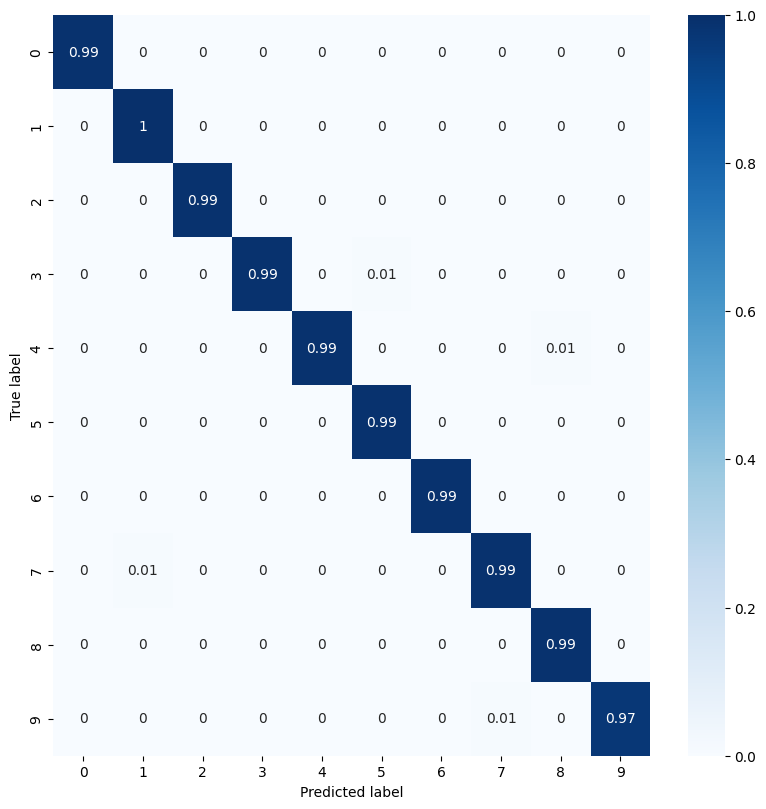

In [15]:
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=np.argmax(yieldy_pred, axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [16]:
# calcula a Acuracia
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=np.argmax(yieldy_pred, axis=1)).numpy()


previsoes_corretas = np.trace(con_mat)


total_previsoes = np.sum(con_mat)


acuracia_final = previsoes_corretas / total_previsoes

print(f"Acurácia final do modelo (calculada pela matriz de confusão): {acuracia_final:.4f}")

Acurácia final do modelo (calculada pela matriz de confusão): 0.9884


In [21]:
# sensibilidade Recall
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=np.argmax(yieldy_pred, axis=1)).numpy()

positivos_0 = con_mat[0, 0]


negativos = np.sum(con_mat[0, :]) - positivos_0

sensibilidade = positivos_0 / (positivos_0 + negativos)

print(f"Sensibilidade (Recall) para a classe 0: {sensibilidade:.4f}")


Sensibilidade (Recall) para a classe 0: 0.9898


In [22]:
# Especificidade

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=np.argmax(yieldy_pred, axis=1)).numpy()
positivo_true = con_mat[0, 0]

negativo_falso = np.sum(con_mat[0, :]) - positivo_true

positivo_falso = np.sum(con_mat[:, 0]) - positivo_true

total_amostras = np.sum(con_mat)
negativo_true = total_amostras - (positivo_true + negativo_falso + positivo_falso)

especificidade = negativo_true / (negativo_true + positivo_falso)

print(f"Especificidade para a classe 0: {especificidade:.4f}")


Especificidade para a classe 0: 0.9993


In [23]:
# Precisão
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=np.argmax(yieldy_pred, axis=1)).numpy()

positivo = con_mat[0, 0]

positivo_falso = np.sum(con_mat[:, 0]) - positivo

precisao = positivo / (positivo + positivo_falso)

print(f"Precisão para a classe 0: {precisao:.4f}")

Precisão para a classe 0: 0.9939


In [24]:
# F-Score

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=np.argmax(yieldy_pred, axis=1)).numpy()

positivos = con_mat[0, 0]
negativos_falso = np.sum(con_mat[0, :]) - positivos
positivo_falso = np.sum(con_mat[:, 0]) - positivos

sensibilidade = positivos / (positivos + negativos_falso)

precisao = positivos / (positivos + positivo_falso)

f1_score_0 = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

print(f"F1-Score para a classe 0: {f1_score_0:.4f}")

F1-Score para a classe 0: 0.9918
